# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bandarbeyla
Processing Record 2 of Set 1 | mazamari
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | island harbour
Processing Record 5 of Set 1 | laguna
Processing Record 6 of Set 1 | geraldton
Processing Record 7 of Set 1 | new ulm
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | robit
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | new shagunnu
Processing Record 14 of Set 1 | khovd
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | toga village
City not found. Skipping...
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | lerwick
Processing Record 20 of Set 1 | piedecuesta
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1

Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | poronaysk
Processing Record 41 of Set 4 | la passe
Processing Record 42 of Set 4 | itacare
Processing Record 43 of Set 4 | nemuro
Processing Record 44 of Set 4 | point pedro
Processing Record 45 of Set 4 | ha'il
Processing Record 46 of Set 4 | nuku'alofa
Processing Record 47 of Set 4 | biskra
Processing Record 48 of Set 4 | east ballina
Processing Record 49 of Set 4 | richards bay
Processing Record 0 of Set 5 | tolanaro
Processing Record 1 of Set 5 | tateyama
Processing Record 2 of Set 5 | sumbawanga
Processing Record 3 of Set 5 | pipar
Processing Record 4 of Set 5 | minas de marcona
Processing Record 5 of Set 5 | carqueiranne
Processing Record 6 of Set 5 | san andros
City not found. Skipping...
Processing Record 7 of Set 5 | wailua homesteads
Processing Record 8 of Set 5 | nuuk
Processing Record 9 of Set 5 | tashtagol
Processing Record 10 of Set 5 | gaalkacyo
Processing Record 11 of Set 5 | strelka
Processing Rec

Processing Record 32 of Set 8 | presque isle
Processing Record 33 of Set 8 | pushkinskiye gory
Processing Record 34 of Set 8 | sechura
Processing Record 35 of Set 8 | mao
Processing Record 36 of Set 8 | safotu
Processing Record 37 of Set 8 | vengerovo
Processing Record 38 of Set 8 | remire-montjoly
Processing Record 39 of Set 8 | kalamata
Processing Record 40 of Set 8 | alotau
City not found. Skipping...
Processing Record 41 of Set 8 | lushun
Processing Record 42 of Set 8 | petersburg
Processing Record 43 of Set 8 | san juan de miraflores
Processing Record 44 of Set 8 | filey
Processing Record 45 of Set 8 | nyurba
Processing Record 46 of Set 8 | saipan
Processing Record 47 of Set 8 | morondava
Processing Record 48 of Set 8 | swakopmund
Processing Record 49 of Set 8 | burang
Processing Record 0 of Set 9 | georgetown
Processing Record 1 of Set 9 | selma
Processing Record 2 of Set 9 | flying fish cove
Processing Record 3 of Set 9 | champerico
Processing Record 4 of Set 9 | palangkaraya
Pr

City not found. Skipping...
Processing Record 22 of Set 12 | iwon-up
Processing Record 23 of Set 12 | linkou
Processing Record 24 of Set 12 | kelso
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bandarbeyla,9.4942,50.8122,24.38,79,44,14.76,SO,1689698788
1,mazamari,-11.3258,-74.5308,24.21,85,91,0.72,PE,1689698788
2,college,64.8569,-147.8028,16.56,85,75,1.54,US,1689698699
3,island harbour,50.7240,-1.2758,22.86,54,52,1.79,GB,1689698789
4,laguna,38.4210,-121.4238,31.16,48,0,5.14,US,1689698789


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bandarbeyla,9.4942,50.8122,24.38,79,44,14.76,SO,1689698788
1,mazamari,-11.3258,-74.5308,24.21,85,91,0.72,PE,1689698788
2,college,64.8569,-147.8028,16.56,85,75,1.54,US,1689698699
3,island harbour,50.7240,-1.2758,22.86,54,52,1.79,GB,1689698789
4,laguna,38.4210,-121.4238,31.16,48,0,5.14,US,1689698789


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

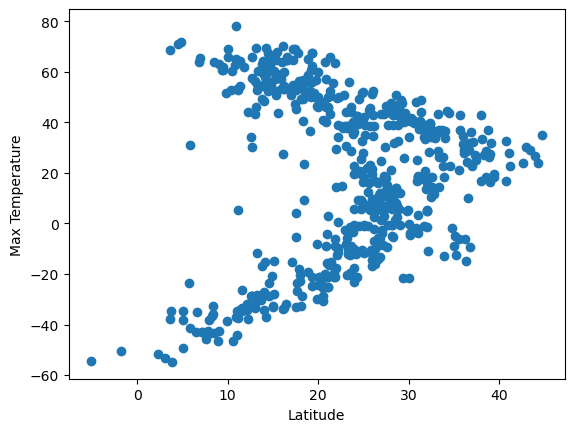

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

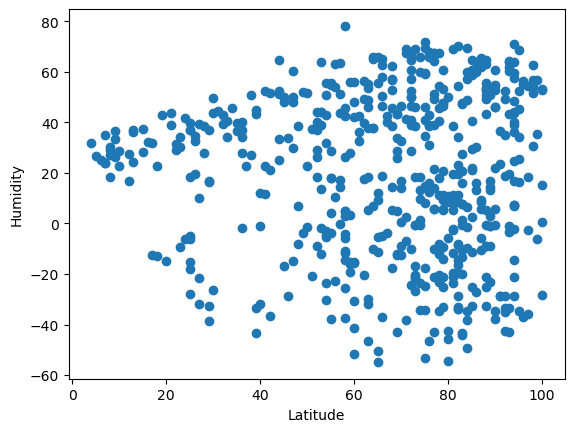

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

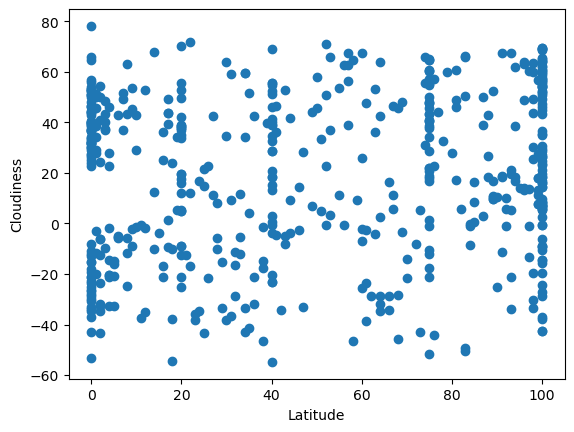

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

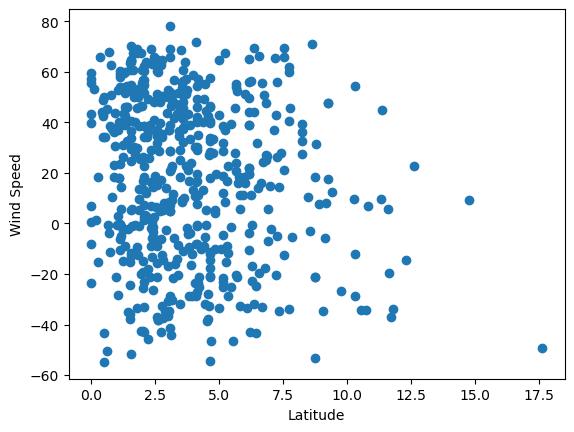

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bandarbeyla,9.4942,50.8122,24.38,79,44,14.76,SO,1689698788
2,college,64.8569,-147.8028,16.56,85,75,1.54,US,1689698699
3,island harbour,50.7240,-1.2758,22.86,54,52,1.79,GB,1689698789
4,laguna,38.4210,-121.4238,31.16,48,0,5.14,US,1689698789
6,new ulm,44.3125,-94.4605,23.61,52,0,3.60,US,1689698789


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mazamari,-11.3258,-74.5308,24.21,85,91,0.72,PE,1689698788
5,geraldton,-28.7667,114.6000,18.23,82,100,10.29,AU,1689698789
7,touros,-5.1989,-35.4608,28.21,65,33,7.85,BR,1689698790
8,port-aux-francais,-49.3500,70.2167,5.11,84,83,17.62,TF,1689698790
9,adamstown,-25.0660,-130.1015,21.03,79,90,4.23,PN,1689698551


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6036357588582916


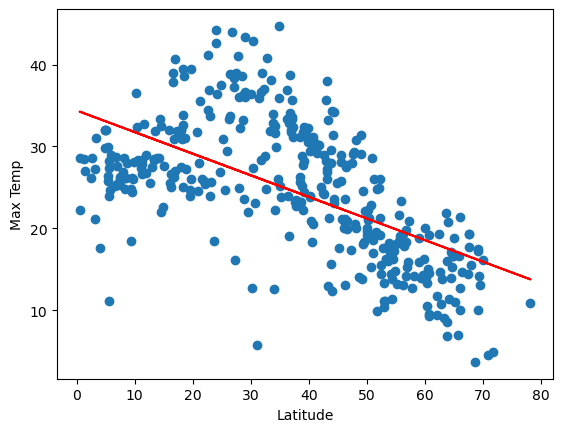

In [20]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.8587159059379184


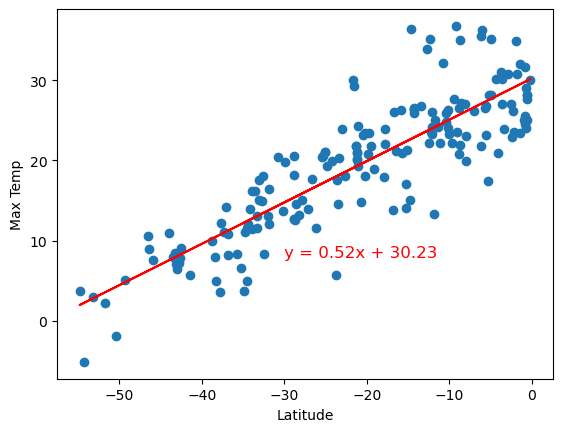

In [19]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** 

There is a strong negative correlation between temperature and latitude with a correlation coefficient of -0.6036357588582916 on Northern Hemisphere.

There is a strong positive correlation between temperature and latitude with a correlation coefficient of 0.8587159059379184 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11146688288282695


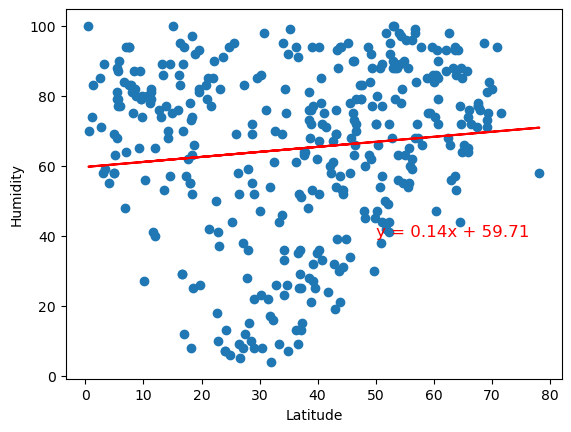

In [21]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: -0.09685379828295484


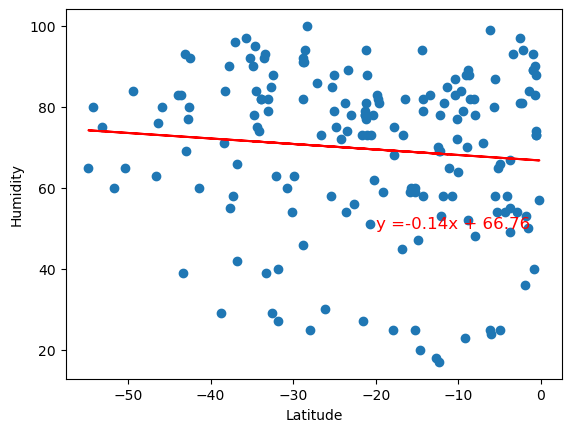

In [22]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** 

There is a  positive correlation between humidity and latitude with a correlation coefficient of 0.11146688288282695 on Northern Hemisphere.

There is a slightly correlation correlation between humidity and latitude with a correlation coefficient of -0.11146688288282695 on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.06873205329524906


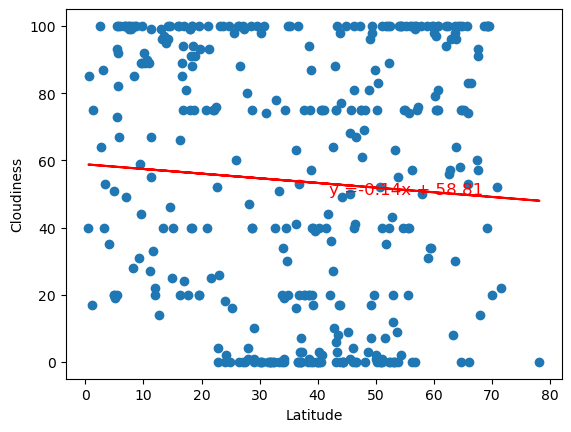

In [23]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.007803124135551584


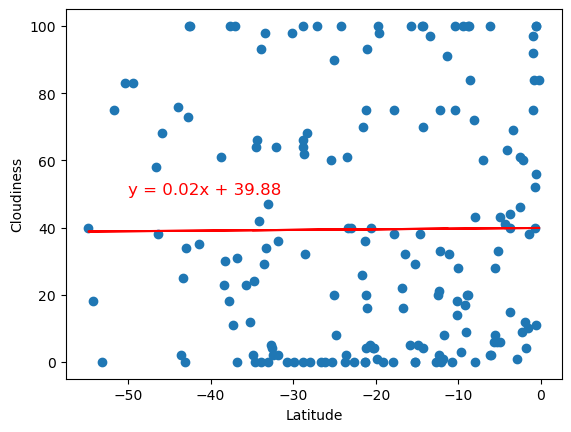

In [24]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** 

There is a slight negative between cloudiness and latitude with a correlation coefficient of -0.06873205329524906 on Northern Hemisphere.

There is a positive correlation between cloudiness and latitude with a correlation coefficient of 0.007803124135551584 on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.16440504815999146


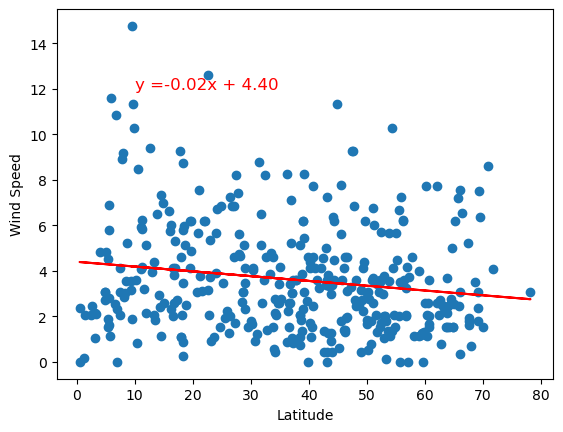

In [25]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.1404367138442857


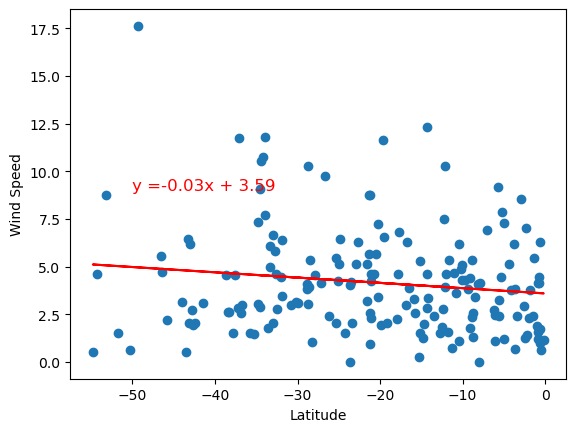

In [26]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** 

There is a negative correlation between wind speed and latitude with a correlation coefficient of -0.16440504815999146 on Northern Hemisphere.

There is a weak negative correlation between wind speed and latitude with a correlation coefficient of -0.1404367138442857 on Southern Hemisphere.